Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 6:  Linear Algebra Part 1

## Question 1

[25] - Write a function that computes the least-squares fit of a given polynomial order $n$ without using the function `numpy.linalg.lstsq` and `numpy.vander` (i.e. construct the system that needs to be solved yourself).  This function should return the coefficients of the resulting polynomial in accending order of powers.  If the function does not receive valid input (most notably an underconstrained system) raise a `ValueError` with an appropriate error message.  Make sure to mention this in your `doc-string`.  You can use `numpy.linalg.solve`. 

Also write a function that plots the resulting polynomial along with the data given the data, a set of $x$ points and the coefficients from the first function.  Make sure to label your plot (both the axes and with a legend).

In [2]:
def compute_lstsq(data, n):
    # YOUR CODE HERE
    # raise NotImplementedError()
    
    # determine
    a, b = data.shape
    if a < n:
        raise ValueError("The system is underconstrained.")
    
    else:
        # calculate
        A = numpy.ones((data.shape[0], n+1))
        for i in range(n+1):
            A[:, i] = data[:, 0] ** i
        p = numpy.linalg.solve(numpy.dot(A.transpose(), A), numpy.dot(A.transpose(), data[:, 1]))
    
    return p

def plot_lstsq(data, x, p):
    # YOUR CODE HERE
    # raise NotImplementedError()
    figure = plt.figure(figsize = (7, 5))
    plt.plot(data[:, 0], data[:, 1], 'ko')
    m, n = data.shape
    k = len(p)
    P = numpy.zeros(len(x))
    for i in range(len(x)):
        for j in range (min(m, k)):
            P[i] += p[j] * x[i]**j
    plt.plot(x, P, 'r')
    plt.xlabel("$x$", fontsize = 12)
    plt.ylabel("$y$ and $f(x)$", fontsize = 12)
    plt.title("Least Squares Fit to Data", fontsize = 15)
    plt.legend(["$y$: exact value", "$f(x)$: fitted value"])
    
    plt.show()

Success!


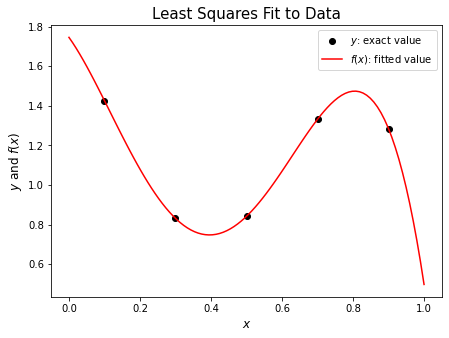

In [3]:
try:
    N = 5
    N_p = 4
    data = numpy.empty((N, 2))
    data[:, 0] = numpy.random.uniform(size=N)
    data[:, 0] = numpy.linspace(0.1, 0.9, N)
    data[:, 1] = numpy.sin(numpy.exp(-data[:, 0]**2)) + numpy.random.uniform(size=N)
    p = compute_lstsq(data, N_p)
except ValueError as e:
    raise e
else:
    P = numpy.zeros(N)
    for n in range(N):
        P += p[n] * data[:, 0]**n
    numpy.testing.assert_allclose(P, data[:, 1])
    print("Success!")

    # Plot result
    x = numpy.linspace(0.0, 1.0, 100)
    plot_lstsq(data, x, p)
    plt.show()

Success!


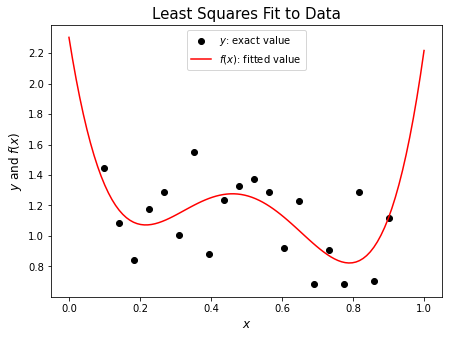

In [4]:
try:
    N = 20
    N_p = 4
    data = numpy.empty((N, 2))
    data[:, 0] = numpy.random.uniform(size=N)
    data[:, 0] = numpy.linspace(0.1, 0.9, N)
    data[:, 1] = numpy.sin(numpy.exp(-data[:, 0]**2)) + numpy.random.uniform(size=N)
    p = compute_lstsq(data, N_p)
except ValueError as e:
    print(e)
else:
    A = numpy.vander(data[:,0], N_p + 1)
    numpy.testing.assert_allclose(p, numpy.flipud(numpy.linalg.lstsq(A, data[:, 1])[0]))
    print("Success!")

    # Plot result
    x = numpy.linspace(0.0, 1.0, 100)
    plot_lstsq(data, x, p)
    plt.show()

In [5]:
try:
    N = 5
    N_p = 6
    data = numpy.empty((N, 2))
    data[:, 0] = numpy.random.uniform(size=N)
    data[:, 0] = numpy.linspace(0.1, 0.9, N)
    data[:, 1] = numpy.sin(numpy.exp(-data[:, 0]**2)) + numpy.random.uniform(size=N)
    p = compute_lstsq(data, N_p)
except ValueError as e:
    print(e)
else:
    A = numpy.vander(data[:,0], N_p + 1)
    numpy.testing.assert_allclose(p, numpy.flipud(numpy.linalg.lstsq(A, data[:, 1])[0]))
    print("Success!")

    # Plot result
    x = numpy.linspace(0.0, 1.0, 100)
    plot_lstsq(data, x, p)
    plt.show()
    assert(False)

The system is underconstrained.


## Question 2

Consider a square matrix that looks like
$$
    A = \frac{1}{\Delta x^2} \begin{bmatrix}
        -2 &  1 &  ~ &  ~ &  ~ &  ~ &  ~ \\
         1 & -2 &  1 &  ~ &  ~ &  ~ &  ~ \\
         ~ &  1 & -2 &  1 &  ~ &  ~ &  ~ \\
         ~ &  ~ & \ddots & \ddots & \ddots & ~ & ~\\
         ~ &  ~ & ~ & 1 & -2 & 1 & ~ \\
         ~ &  ~ & ~ & ~ & 1 & -2 & 1 \\
         ~ &  ~ & ~ & ~ &  ~ & 1 & -2 \\
    \end{bmatrix}
$$
This matrix can be characterized as having $A_{ii} = -2$, $A_{ii-1} = A_{ii+1} = 1$ so that the "main" diagonal has the value -2 and the secondary-diagonals are 1 (these are the diagonals that are just above and below the main diagonal).  This matrix is from a discretization of the second derivative using a second order finite difference formula (hence the values of 1, -2, and 1 and the $\Delta x^2$ factor) with boundary conditions set to 0.  

**(a)** [10] - Write a function that computes the eigenvalues of the matrix above using whatever functions you would like.  The function should take in the size of the matrix $m$ (the matrix should be square) and the value of $\Delta x$ and return the eigenvalues.  You may use the `numpy.linalg.eigvals` command.

In [6]:
def compute_eigenvalues(m, dx):
    # YOUR CODE HERE
    # raise NotImplementedError()
    A = numpy.zeros((m, m))
    row, col = numpy.diag_indices_from(A)
    A[row, col] = -2
    
    A_plus = A[0:m - 1, 1:m]
    row, col = numpy.diag_indices_from(A_plus)
    A_plus[row, col] = 1
    A[0:m-1, 1:m] = A_plus
    
    A_minors = A[1:m, 0:m - 1]
    row2, col2 = numpy.diag_indices_from(A_minors)
    A_minors[row2, col2] = 1
    A[1:m, 0:m - 1] = A_minors
    
    A = A/(dx ** 2)
    
    eig_values = numpy.linalg.eigvals(A)

    return eig_values

In [7]:
# Compare against analytical values
m = 10
dx = 1.0 / (m + 1)
eig_values = numpy.flipud(numpy.sort(compute_eigenvalues(m, dx)))
p = numpy.arange(1, m + 1)
numpy.testing.assert_allclose(eig_values,
    2.0 / dx**2 * (numpy.cos(p * numpy.pi * dx) - 1.0))
print("Success!")

Success!


**(b)** [10] - Plot the eigenvalues in the complex plane for $m=30$ and $\Delta x = 1/31$.  Make sure to plot the axes and label everything appropriately.

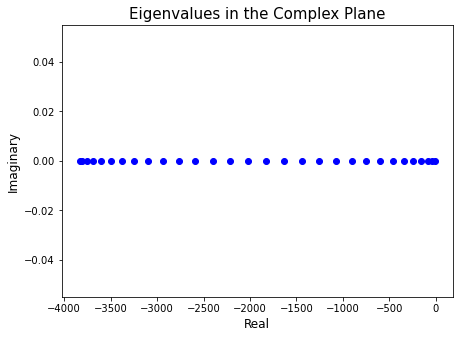

In [8]:
# YOUR CODE HERE
# raise NotImplementedError()
m = 30
dx = 1.0 / (m + 1)
eig_values = numpy.flipud(numpy.sort(compute_eigenvalues(m, dx)))  # rank from big to small

x = [ele.real for ele in eig_values]
y = [ele.imag for ele in eig_values]

figure = plt.figure(figsize = (7, 5))
plt.scatter(x, y, color = "blue")
plt.ylabel('Imaginary', fontsize = 12)
plt.xlabel('Real', fontsize = 12)
plt.title("Eigenvalues in the Complex Plane", fontsize = 15)
plt.show()

**(c)** [15] - Think of the above matrix as specifying a system of ODEs.  The exact eigenvalues of the matrix are
$$
    \lambda_p = \frac{2}{\Delta x^2} (\cos(p \pi \Delta x) - 1)
$$
for $p = 1, \ldots, m$.  Find an expression for $\max_{p = 1, \ldots, m} |\lambda_p|$.  Based on our understanding of absolute stability what be the maximum time-step we could use for this system of ODEs if we used the forward Euler method?  What about for the backward Euler method?  How does this relate to the absolute stability regions of each method?

**Step 1: Maximum Expression**

Since $$cosx \in [-1, 1],  |cosx| \in [0, 1]$$
$$|cosx - 1| \in [0, 2]$$

And we know that $\Delta x$ is fixed, 
So to maximize $\lambda_p$. we need to set $$\cos(p \pi \Delta x) = -1$$
$$p \pi \Delta x = \pi + 2k\pi$$

Therefore, for

$$p = \frac{1+2k}{\Delta x}, k = 0, 1, 2,\cdots$$

the maximum expression of  $|\lambda_p|$ is $$ |\lambda_p| = \frac{4}{\Delta x^2}$$

**Step 2: Forward Euler**

Plug the maximum expression into the region of forward Euler method.
$$|1 + \Delta t \lambda| \leq 1$$

Since $$ |\lambda_p| = \frac{4}{\Delta x^2}, \lambda_p \leq 0$$

We have
$$| 1 - \Delta t \cdot  \frac{4}{\Delta x^2} | \leq 1$$

$$ -2 \leq -\Delta t \cdot \frac{4}{\Delta x^2} \leq 0$$

$$ \frac{-\Delta x^2}{2} \leq -\Delta t \leq 0$$

$$\Delta t \leq \frac{\Delta x^2}{2}$$

So, the maximum time-step we could use for this system is $\frac{\Delta x^2}{2}$.

**Step 3: Backward Euler**

Plug the maximum expression into the region of backward Euler method.

$$\left|\frac{1}{1-z}\right| \leq 1 \leftrightarrow |1 - z| \geq 1$$

$$| 1 + \Delta t \cdot \frac{4}{\Delta x^2} | \geq 1$$

$$1 + \Delta t \cdot \frac{4}{\Delta x^2} \geq 1$$

$$\Delta t \cdot \frac{4}{\Delta x^2} \geq 0$$

$$\Delta t \geq 0$$

So, the there is no maximum time-step and any $\Delta t \geq 0$ would be fine.

**Step 4: Comments**

1. The stability region of backward Euler method is wider than the forward Euler method.

2. The stability region of backward Euler method can sometime include the that of forward Euler method, which is the same as the stability plot on slides.

## Question 3

Let us further explore the connection between the unit-ball in various norms and the matrix norm.  For all these questions you can use `numpy.linalg.norm` and `numpy.dot` and can be approximations, not the exact versions of what is being asked.  For these questions be aware also that there is a time-limit for running a cell in a notebook imposed so your results should not take longer than 15-30 seconds.

**(a)** [10] Write a function that given a particular norm plots the given unit-ball in $\mathbb R^2$.  You may use `numpy.linalg.norm`.  Use the test code to verify your results noting that there may be some special cases that need to be handled.

In [9]:
def unit_ball(axes, ord):
    """Plot the unit-ball in $\mathbb R^2$
    
    :Input:
     - *axes* (matplotlib.axes) Axes to plot the ball on
     - *ord* (float) The norm requested.
    """
    # YOUR CODE HERE
    # raise NotImplementedError()
    t = numpy.linspace(0, numpy.pi*2, 100)
    axes.plot(numpy.cos(t), numpy.sin(t), linewidth=1, color = 'b')
    N = 100
    X, Y = numpy.meshgrid(numpy.linspace(-1.1, 1.1, N), numpy.linspace(-1.1, 1.1, N))
    V = numpy.empty((N, N))
    for i in range(N):
        for j in range(N):
            V[i, j] = numpy.linalg.norm(numpy.array([X[i, j], Y[i, j]]), ord=ord)
    contourset = axes.contour(X, Y, V, 'red', levels=[1])
    axes.set_xlim((-1.1, 1.1))
    axes.set_ylim((-1.1, 1.1))
    axes.grid(alpha = 0.4)
    ball = contourset.allsegs[0][0]
    axes.plot(ball[:,0], ball[:,1],'r')

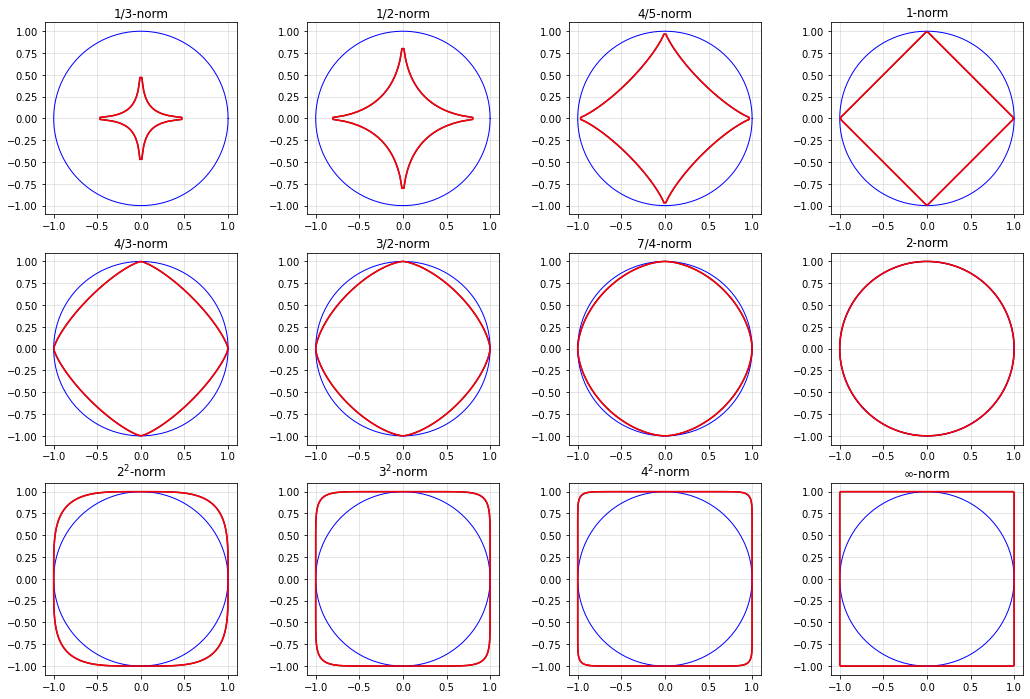

In [10]:
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 3)
fig.set_figheight(fig.get_figheight() * 3)
norms = [1.0 / 3.0, 0.5, 4.0 / 5.0, 1, 1.3, 1.5, 1.75, 2, 4, 9, 16, numpy.infty]
titles = ["1/3-norm", "1/2-norm", "4/5-norm", "1-norm", "4/3-norm", "3/2-norm", "7/4-norm", 
          "2-norm", "$2^2$-norm", "$3^2$-norm", "$4^2$-norm", "$\infty$-norm"]
for (i, ord) in enumerate(norms):
    axes = fig.add_subplot(3, 4, i + 1, aspect='equal')
    unit_ball(axes, ord)
    axes.set_title(titles[i])
plt.show()

**(b)** [10] Now write a function that produces a plot of the image of the unit-ball given a matrix $A$ and returns the resulting matrix norm.  Both of these can be estimates of the norm but mind the time it takes to compute them.  You can also use `numpy.linalg.norm` for vectors but **NOT** the matrix (unless you want to check your answer).

In [11]:
def unit_ball_image(axes, A, ord):
    """Plot the image of the unit ball under the tranformation resulting from *A* 
    and return an estimate of the matrix norm 
    
    :Input:
     - *axes* (matplotlib.axes) Axes to plot the transformed ball on
     - *A* (ndarray) Matrix that represents the mapping (transformation)
     - *ord* (float) The norm requested.
     
    :Output:
     - (float) Maximum norm estimate (i.e. the matrix norm)
    """
    # YOUR CODE HERE
    # raise NotImplementedError()
    t = numpy.linspace(0, numpy.pi*2, 100)
    axes.plot(numpy.cos(t), numpy.sin(t), linewidth=1, color = 'b')
    N = 100
    X, Y = numpy.meshgrid(numpy.linspace(-1.1, 1.1, N), numpy.linspace(-1.1, 1.1, N))
    V = numpy.empty((N, N))
    for i in range(N):
        for j in range(N):
            V[i, j] = numpy.linalg.norm(numpy.array([X[i, j], Y[i, j]]), ord=ord)
    contourset = axes.contour(X, Y, V, 'b', levels=[1])
    axes.grid(alpha = 0.4)
    
    ball = contourset.allsegs[0][0]
    axes.plot(ball[:,0], ball[:,1],'r')
    
    image = (numpy.dot(A, numpy.transpose(ball))).transpose()
    axes.plot(image[:,0],image[:,1],'deeppink')


    M = numpy.empty((N, N))
    for i in range(N):
        for j in range(N):
            A_x = numpy.dot(A, numpy.transpose([X[i, j], Y[i, j]]))
            M[i, j] = numpy.linalg.norm(A_x, ord=ord)/V[i, j]
    ans = M.max()
    
    return ans

0.5-Norm (estimated, true): (6.672199136040674, N/A)
1-Norm (estimated, true): (4.000000000000001, 4.0)
1.5-Norm (estimated, true): (4.066601534924356, N/A)
2-Norm (estimated, true): (4.130648473222881, 4.130648586880582)
4-Norm (estimated, true): (4.348892839679678, N/A)
9-Norm (estimated, true): (4.645598833915608, N/A)
16-Norm (estimated, true): (4.794514451695209, N/A)
inf-Norm (estimated, true): (5.000000000000001, 5.0)


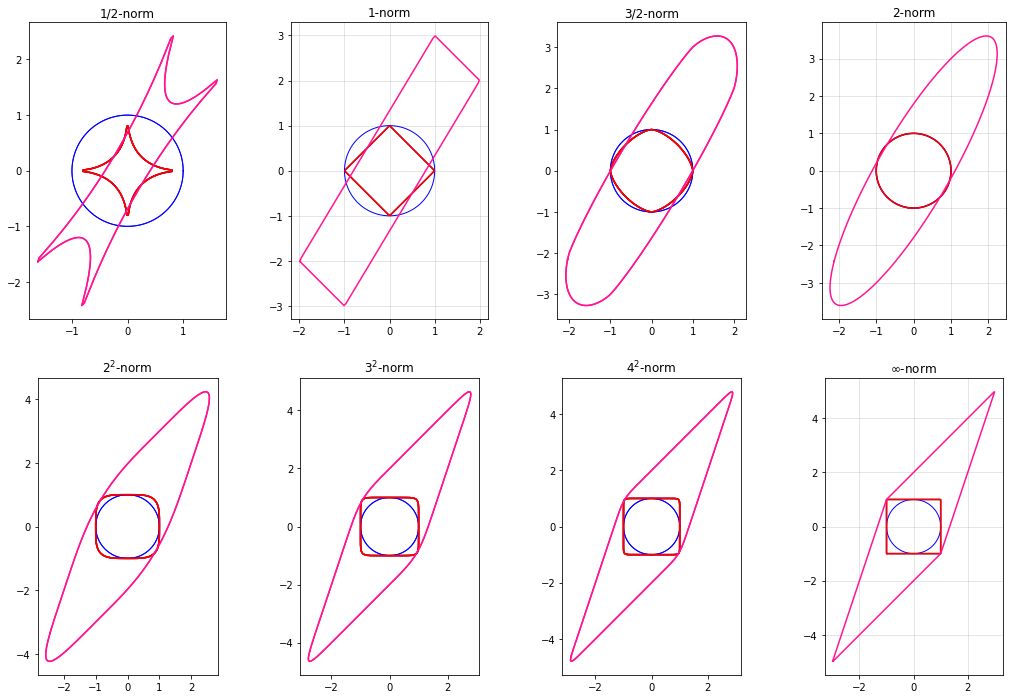

In [12]:
A = numpy.array([[1, 2], [3, 2]])

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 3)
fig.set_figheight(fig.get_figheight() * 3)
norms = [0.5, 1, 1.5, 2, 4, 9, 16, numpy.infty]
titles = ["1/2-norm", "1-norm", "3/2-norm", "2-norm", 
          "$2^2$-norm", "$3^2$-norm", "$4^2$-norm", "$\infty$-norm"]
for (i, ord) in enumerate(norms):
    axes = fig.add_subplot(2, 4, i + 1, aspect='equal')
    try:
        print("%s-Norm (estimated, true): (%s, %s)" % (ord, unit_ball_image(axes, A, ord), numpy.linalg.norm(A, ord=ord)))
    except ValueError:
        print("%s-Norm (estimated, true): (%s, N/A)" % (ord, unit_ball_image(axes, A, ord)))
    axes.set_title(titles[i])
plt.show()

**(c)** [5] What kind of observations can you make based on the two previous questions?  What connection to geometry do you see?  Are the matrix norms requested in part (b) that do not have a `numpy` implementation actually norms?

1. As the $order$ approaches to $2$, the norm approaches to unit circle and the image approches to ellipse and increases. As the $order$ approches to infinity, the norm approches to $2 \times 2$ square and the image approches to diamond. The change of norm and image is synchronous.
2. Some norms requested in part do not have a numpy implementation actually norms, and according to python, it can only compute $0, \pm 1, \pm 2, \infty$ and some other numbers but not all the integers. However, it's meaningful to research those "unreal norms" numerically.